欠擬合(Underfitting) vs. 過擬合(Overfitting)
============================

此操作實例演示了欠擬合和過擬合的問題，以及如何使用具有多項式特徵的線性迴歸來近似非線性函數。該圖顯示了我們要近似的函數，它是餘弦函數的一部分。此外，還將顯示來自實際函數的樣本以及不同模型的近似值。這些模型具有不同程度的多項式特徵。我們可以看到線性函數（degree為1的多項式）不足以擬合訓練樣本。這就是所謂的**欠擬合**。 4次多項式幾乎完美地逼近了真實函數。但是，對於較高的度數，模型將**過擬合**訓練資料，即模型會學習訓練資料的雜訊。
我們使用交叉驗證對**過擬合** / **欠擬合**進行定量評估。我們在驗證集上計算均方誤差（MSE），數值越高，模型從訓練資料中正確推廣到測試資料或其他資料的可能性就越小。

In [1]:
#導入需要套件
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures  #1次 4次 15次
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score  #交叉驗證

Automatically created module for IPython interactive environment


In [3]:
#獲取資料
def true_fun(X):
    return np.cos(1.5 * np.pi * X)   # y

np.random.seed(0)  #保證每次跑程式結果一樣

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1    # np.random.randn(n_samples) * 0.1  雜訊

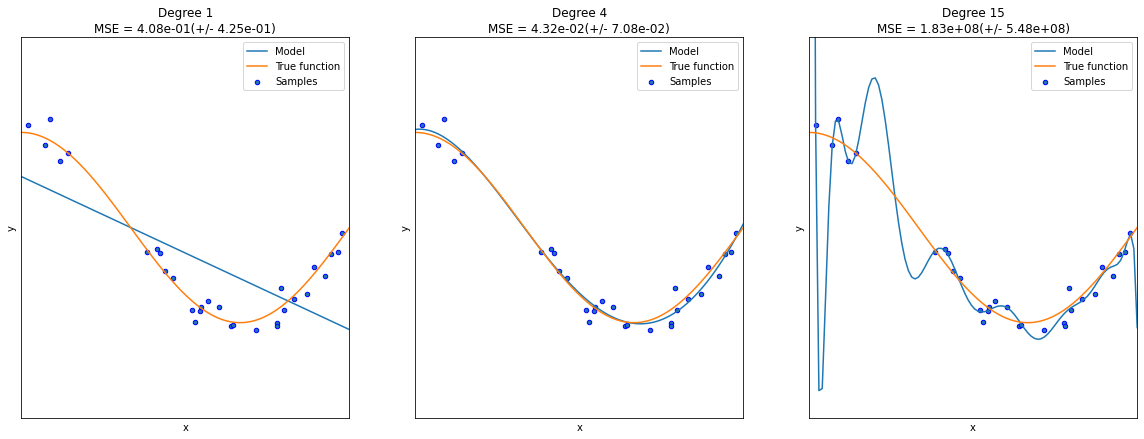

In [4]:
# 展示Underfitting vs. Overfitting
# Degree 1為Underfitting  訓練不足
# Degree 15為Overfitting  即為貼合訓練集 連每個雜訊都找到
plt.figure(figsize=(20,7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 產生多項式和交互特徵
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # 建立線性迴歸模型
    linear_regression = LinearRegression()
    
    # 建立管道，依照順序進行產生多項式特徵與建立線性迴歸模型
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    # 訓練管道
    pipeline.fit(X[:, np.newaxis], y)

    # 以交叉驗證評估模式
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)   #10折交叉驗證

    # 將結果畫出來
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

True